# Scanning Session Ingestion

## Setup

### Connect to the database

If you are don't have your login information, contact the administrator.

Using local config file (see [01_pipeline](./01_pipeline.ipynb)):

In [1]:
import os
# change to the upper level folder to detect dj_local_conf.json
if os.path.basename(os.getcwd())=='notebooks': os.chdir('..')
assert os.path.basename(os.getcwd())=='adamacs', ("Please move to the main directory")
import datajoint as dj; dj.conn()

from adamacs.pipeline import subject, session, surgery, scan, equipment
from adamacs import utility
from adamacs.ingest import session as isess
sub, lab, protocol, line, mutation, user, project, subject_genotype, subject_death = (
    subject.Subject(), subject.Lab(), subject.Protocol(), subject.Line(), 
    subject.Mutation(), subject.User(), subject.Project(), subject.SubjectGenotype(), 
    subject.SubjectDeath())

[2023-01-14 09:27:58,907][INFO]: Connecting tobiasr@172.26.128.53:3306
[2023-01-14 09:27:58,947][INFO]: Connected tobiasr@172.26.128.53:3306
2023-01-14 09:27:59.076298: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-14 09:27:59.076328: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Loading DLC 2.2.1.1...


/home/tobiasr/anaconda3/envs/datajoint/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)


In [ ]:
# subject.Subject.drop()
# subject.Mutation.drop()
# subject.Protocol.drop()
# subject.Line.drop()
# subject.SubjectGenotype.drop()
# equipment.Equipment.drop()
# scan.Scan.drop()
# session.Session.drop()
# imaging.Processing.drop()

In [ ]:
# session.Session.delete()

In [ ]:
scan.Scan.describe()

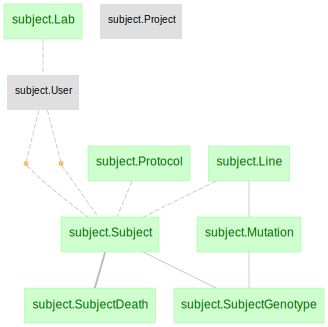

In [2]:
dj.Diagram(subject) + dj.Diagram(protocol)

Manual entry:

In [ ]:
# Manual Entry
import datajoint as dj; import getpass
dj.config['database.host'] = '172.26.128.53'        # Put the server name between these apostrophe
dj.config['database.user'] = 'danielmk'             # Put your user name between these apostrophe
dj.config['database.password'] = getpass.getpass()  # Put your password in the prompt
dj.conn()

from adamacs.pipeline import subject, session, surgery, scan, equipment
from adamacs import utility
from adamacs.ingest import session as isess
sub, lab, protocol, line, mutation, user, project, subject_genotype, subject_death = (
    subject.Subject(), subject.Lab(), subject.Protocol(), subject.Line(), 
    subject.Mutation(), subject.User(), subject.Project(), subject.SubjectGenotype(), 
    subject.SubjectDeath())


## Ingesting scan

Ingest all scans associated with a given session ID.

In [47]:
# isess.ingest_session_scan('sess9FB2LN5C', verbose=True)
isess.ingest_session_scan('sess9FG1UAQG', verbose=True) #TR: needs to be SessioID ("sess...")

Number of scans found: 1
[['scan9FG1UAQG']]
['TR_ROS-1438_2023-01-13_scan9FG1UAQG_sess9FG1UAQG']


/tmp/ipykernel_4073016/3442756604.py:2: UserWarning: 
Skipped existing session row: ('sess9FG1UAQG', <module 'adamacs.schemas.subject' from '/home/tobiasr/adamacs/adamacs/schemas/subject.py'>, '2023-01-13')
  isess.ingest_session_scan('sess9FG1UAQG', verbose=True) #TR: needs to be SessioID ("sess...")


DuplicateError: ("Duplicate entry 'TEC-sess9FG1UAQG' for key 'PRIMARY'", 'To ignore duplicate entries in insert, set skip_duplicates=True')

In [9]:
session.Session()

session_id,subject PyRat import uses this for earmark value,session_datetime
sess9FG1UAQG,ROS-1438,2023-01-13 00:00:00


In [5]:
session.SessionDirectory() * session.ProjectSession()

session_id,project,session_dir Path to the data directory for a session,user_id
sess9FG1UAQG,TEC,/datajoint-data/data/tobiasr/TR_ROS-1438_2023-01-13_scan9FG1UAQG_sess9FG1UAQG,1


In [6]:
session.ProjectSession()

project,session_id
TEC,sess9FG1UAQG


In [48]:
key='scan9FG1UAQG'
(scan.Scan & f'scan_id=\"{key}\"')

session_id,scan_id,scanner,acq_software,scan_notes free-notes
sess9FG1UAQG,scan9FG1UAQG,mini2p1,ScanImage,


Simple user look-up to get user_id from shorthand

In [11]:
key='TR'
query = (subject.User & f'initials=\"{key}\"')
id = query.fetch("user_id")[0]
print(key + ' = ' + str(id))

TR = 1


In [42]:
key='%Tob%'
query = (subject.User & f'name LIKE \"{key}\"')
id = query.fetch("user_id")
print(key + ' = ' + str(id))

%Tob = []


In [40]:
key='%Ji%'
query = (subject.User & f'name LIKE \"{key}\"')
query.fetch("email")

array(['jjun1@uni-bonn.de'], dtype=object)

In [44]:
query = subject.Subject() & '"ROS-1380"'
query.fetch()

array([],
      dtype=[('subject', 'O'), ('earmark', 'O'), ('sex', 'O'), ('birth_date', 'O'), ('death_date', 'O'), ('generation', 'O'), ('parent_ids', 'O'), ('owner_id', '<i8'), ('responsible_id', '<i8'), ('line', '<i8'), ('protocol', 'O')])

In [45]:
subject.Subject() & "subject = 'ROS-1346'"

subject PyRat import uses this for earmark value,earmark,sex Geschlecht,birth_date Geb.,death_date Gest.,generation Generation (F2 in example sheet),parent_ids dict of parent_sex: parent_eartag,owner_id,responsible_id,line strain_id within PyRAT. Not name_id seen in GUI,protocol


##### Some placeholders for equipment and location during development

In [46]:
session.Session() session.()

SyntaxError: invalid syntax (2047936882.py, line 1)

In [ ]:
scan.Scan()

In [ ]:
scan.Scan * scan.ScanInfo

Note the relative path below:

In [ ]:
#temporary step - insert placeholder values
equipment_placeholder = "Equipment"
location_placeholder = "Location"
from adamacs.pipeline import Equipment, Location
Equipment.insert1({'scanner' : equipment_placeholder}, skip_duplicates=True)
Location.insert1({'anatomical_location': location_placeholder}, skip_duplicates=True) 

In [ ]:
Equipment.delete()


In [ ]:
Location()

In [ ]:
Session()